In [1]:
import os

# Set the base directory (in case you want to
# keep a notebook in a subfolder)
subdir = ''
basedir = os.environ['PWD'] + subdir

os.chdir(basedir)

In [2]:
# Local package imports
from libs.GcmData.GcmDataLoaderRocke3d import GcmDataLoaderRocke3d

import libs.utils

## Loading data from a file

In [3]:
# This class has been created by me to make it easier
# to plot data from different models, by standardising
# variable names, where the latitude/longitude center is
# located, amongst other things. It uses the `xarray`
# library under the hood, and usage is as follows:

# The {id} is replaced with the passed in `id`
# whilst the * represents a wildcard match, or
# in other words, match all files with the pattern
loader = GcmDataLoaderRocke3d(
    id='g2v__t1e__450ma',
    path='../../models/rocke3d/huge_space/{id}/ANN04*.aij{id}.nc',
    path_vert={
        'aijk': '../../models/rocke3d/huge_space/{id}/ANN04*.aijk{id}.nc',
        'aijl': '../../models/rocke3d/huge_space/{id}/ANN04*.aijl{id}.nc',
    }
)

# Load the data, returning an xarray Dataset
gcm_data = loader.load()

Extracting vertical data
Centering longitude
Standardising vars


In [4]:
# Output a summary of the data
gcm_data

<xarray.Dataset>
Dimensions:         (time: 100, lat: 46, lon: 72, lev: 40)
Coordinates:
  * lon             (lon) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * lat             (lat) float32 -90.0 -86.0 -82.0 -78.0 ... 82.0 86.0 90.0
  * time            (time) object 0400-01-01 00:00:00 ... 0499-01-01 00:00:00
  * lev             (lev) float32 989.8 968.5 944.6 ... 0.4461 0.251 0.1413
Data variables: (12/70)
    pcldt           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    qatm            (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_100           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_300           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_500           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_700           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    ...              ...
    hur             (time, lev, lat, lon) float32 62.01 62.01 ... 0.02162
    hus             (time, lev, lat, lon) float32 7.401e-05 ... 4.861e-07
    ta              (time, lev, lat, lon) float32 nan nan nan ... 185.7 185.7
    ua              (time, lev, lat, lon) float32 nan nan nan ... -4.361 -4.719
    va              (time, lev, lat, lon) float32 nan nan nan ... -3.805 -3.424
    w               (time, lev, lat, lon) float32 0.01493 0.01493 ... 0.0 0.0
Attributes:
    xlabel:   g2v__t1e__450ma (1880 atm.,the current modelE version)
    fromto:   From:   400  JAN  1,  Hr  0      To:   401  JAN  1, Hr  0  Mode...
    gcm:      ROCKE-3D
    id:       g2v__t1e__450ma

In [5]:
# Output values of a coordinate:
gcm_data.lon

<xarray.DataArray 'lon' (lon: 72)>
array([-177.5, -172.5, -167.5, -162.5, -157.5, -152.5, -147.5, -142.5, -137.5,
       -132.5, -127.5, -122.5, -117.5, -112.5, -107.5, -102.5,  -97.5,  -92.5,
        -87.5,  -82.5,  -77.5,  -72.5,  -67.5,  -62.5,  -57.5,  -52.5,  -47.5,
        -42.5,  -37.5,  -32.5,  -27.5,  -22.5,  -17.5,  -12.5,   -7.5,   -2.5,
          2.5,    7.5,   12.5,   17.5,   22.5,   27.5,   32.5,   37.5,   42.5,
         47.5,   52.5,   57.5,   62.5,   67.5,   72.5,   77.5,   82.5,   87.5,
         92.5,   97.5,  102.5,  107.5,  112.5,  117.5,  122.5,  127.5,  132.5,
        137.5,  142.5,  147.5,  152.5,  157.5,  162.5,  167.5,  172.5,  177.5],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5

## Data manipulation

In [6]:
# Select a variable like so:
# Note that you can find the units under the attributes in the below output
gcm_data['pr']

<xarray.DataArray 'pr' (time: 100, lat: 46, lon: 72)>
dask.array<truediv, shape=(100, 46, 72), dtype=float32, chunksize=(1, 46, 72), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
  * time     (time) object 0400-01-01 00:00:00 ... 0499-01-01 00:00:00
Attributes:
    variable_long_name:    Precipitation
    variable_units:        kg m-2 s-1
    variable_units_latex:  $mm$ $s^{-1}$

In [7]:
# We can take a mean across all timesteps of the data
gcm_slice = gcm_data.mean('time')

# See how gcm_slice compares to gcm_data
gcm_slice

<xarray.Dataset>
Dimensions:         (lat: 46, lon: 72, lev: 40)
Coordinates:
  * lon             (lon) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * lat             (lat) float32 -90.0 -86.0 -82.0 -78.0 ... 82.0 86.0 90.0
  * lev             (lev) float32 989.8 968.5 944.6 ... 0.4461 0.251 0.1413
Data variables: (12/70)
    pcldt           (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    qatm            (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    q_100           (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    q_300           (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    q_500           (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    q_700           (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    ...              ...
    hur             (lev, lat, lon) float32 53.48 53.48 ... 0.02052 0.02052
    hus             (lev, lat, lon) float32 2.45e-05 2.45e-05 ... 4.71e-07
    ta              (lev, lat, lon) float32 nan nan nan ... 185.9 185.9 185.9
    ua              (lev, lat, lon) float32 nan nan nan ... -3.755 -4.136 -4.488
    va              (lev, lat, lon) float32 nan nan nan ... -4.559 -4.217 -3.847
    w               (lev, lat, lon) float32 0.01251 0.01251 0.01251 ... 0.0 0.0

In [8]:
# We can also take a mean across longitude and latitude
# BUT, as grid cells vary in size, we have to perform 
# a "weighted average". But, I've created a helper for
# this, which can be accessed through `.gcm_data.weighted_lat()`

gcm_data.gcm_utils\
    .weighted_lat()\
    .mean(('lat', 'lon'))

<xarray.Dataset>
Dimensions:         (time: 100, lev: 40)
Coordinates:
  * time            (time) object 0400-01-01 00:00:00 ... 0499-01-01 00:00:00
  * lev             (lev) float32 989.8 968.5 944.6 ... 0.4461 0.251 0.1413
Data variables: (12/70)
    pcldt           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    qatm            (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    q_100           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    q_300           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    q_500           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    q_700           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    ...              ...
    hur             (time, lev) float32 60.6 57.93 54.28 ... 0.06511 0.03268
    hus             (time, lev) float32 0.0008533 0.0009201 ... 4.797e-07
    ta              (time, lev) float32 243.2 247.8 250.6 ... 182.8 182.1 185.1
    ua              (time, lev) float32 -1.325 -1.492 -1.557 ... 0.1518 0.212
    va              (time, lev) float32 -0.4007 -0.2996 ... 0.1598 0.06576
    w               (time, lev) float32 0.0003541 0.001074 ... -3.343e-09 0.0

In [9]:
# Alternatively, we may want to find the total value
# of something, for example total precipitation (`pr`).
# We again need to use the weighted function for this.
# See how different functions can be 'chained' together 
# to get a time-mean and latitude-longitude sum of `pr`:
# NB Units will be in: kg per second
gcm_data\
    .gcm_utils.weighted_lat()\
    .sum(('lat', 'lon'))\
    .mean('time')\
    ['pr']\
    .values

array(0.0205911, dtype=float32)

In [10]:
# It is possible to select a particular timestep, latitude, 
# and/or longitude. You can add method='nearest' to find the
# nearest datapoint to the input value
gcm_data.sel(lat=80, method='nearest')

<xarray.Dataset>
Dimensions:         (time: 100, lon: 72, lev: 40)
Coordinates:
  * lon             (lon) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
    lat             float32 82.0
  * time            (time) object 0400-01-01 00:00:00 ... 0499-01-01 00:00:00
  * lev             (lev) float32 989.8 968.5 944.6 ... 0.4461 0.251 0.1413
Data variables: (12/70)
    pcldt           (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    qatm            (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    q_100           (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    q_300           (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    q_500           (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    q_700           (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    ...              ...
    hur             (time, lev, lon) float32 56.31 55.84 53.8 ... 0.022 0.02264
    hus             (time, lev, lon) float32 2.172e-05 2.341e-05 ... 4.848e-07
    ta              (time, lev, lon) float32 217.9 218.7 219.2 ... 185.4 185.4
    ua              (time, lev, lon) float32 -0.4331 0.3472 ... -3.266 -3.473
    va              (time, lev, lon) float32 9.547 9.594 9.509 ... -3.371 -3.01
    w               (time, lev, lon) float32 -0.0005141 -0.001241 ... 0.0 0.0
Attributes:
    xlabel:   g2v__t1e__450ma (1880 atm.,the current modelE version)
    fromto:   From:   400  JAN  1,  Hr  0      To:   401  JAN  1, Hr  0  Mode...
    gcm:      ROCKE-3D
    id:       g2v__t1e__450ma

In [11]:
gcm_data.sel(lat=80, lon=80, method='nearest')

<xarray.Dataset>
Dimensions:         (time: 100, lev: 40)
Coordinates:
    lon             float32 82.5
    lat             float32 82.0
  * time            (time) object 0400-01-01 00:00:00 ... 0499-01-01 00:00:00
  * lev             (lev) float32 989.8 968.5 944.6 ... 0.4461 0.251 0.1413
Data variables: (12/70)
    pcldt           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    qatm            (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    q_100           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    q_300           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    q_500           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    q_700           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    ...              ...
    hur             (time, lev) float32 54.93 57.12 54.63 ... 0.0602 0.0201
    hus             (time, lev) float32 1.733e-05 2.666e-05 ... 4.869e-07
    ta              (time, lev) float32 216.7 220.4 222.0 ... 182.5 182.4 185.9
    ua              (time, lev) float32 -4.777 -7.036 -6.743 ... 0.4349 4.231
    va              (time, lev) float32 -6.188 -6.448 -7.503 ... -0.8092 -4.069
    w               (time, lev) float32 -0.002258 -0.005572 ... 1.393e-05 0.0
Attributes:
    xlabel:   g2v__t1e__450ma (1880 atm.,the current modelE version)
    fromto:   From:   400  JAN  1,  Hr  0      To:   401  JAN  1, Hr  0  Mode...
    gcm:      ROCKE-3D
    id:       g2v__t1e__450ma

In [12]:
gcm_data.sel(time='0414-01-01')

<xarray.Dataset>
Dimensions:         (time: 1, lat: 46, lon: 72, lev: 40)
Coordinates:
  * lon             (lon) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * lat             (lat) float32 -90.0 -86.0 -82.0 -78.0 ... 82.0 86.0 90.0
  * time            (time) object 0414-01-01 00:00:00
  * lev             (lev) float32 989.8 968.5 944.6 ... 0.4461 0.251 0.1413
Data variables: (12/70)
    pcldt           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    qatm            (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_100           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_300           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_500           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_700           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    ...              ...
    hur             (time, lev, lat, lon) float32 59.67 59.67 ... 0.02178
    hus             (time, lev, lat, lon) float32 4.808e-05 ... 4.332e-07
    ta              (time, lev, lat, lon) float32 nan nan nan ... 185.6 185.6
    ua              (time, lev, lat, lon) float32 nan nan nan ... -3.748 -4.108
    va              (time, lev, lat, lon) float32 nan nan nan ... -4.388 -4.061
    w               (time, lev, lat, lon) float32 0.0234 0.0234 ... 0.0 0.0
Attributes:
    xlabel:   g2v__t1e__450ma (1880 atm.,the current modelE version)
    fromto:   From:   400  JAN  1,  Hr  0      To:   401  JAN  1, Hr  0  Mode...
    gcm:      ROCKE-3D
    id:       g2v__t1e__450ma

In [13]:
# You can also select a time range or 'slice', e.g.:
gcm_data.sel(time=slice('0414-01-01', '0420-01-01'))

<xarray.Dataset>
Dimensions:         (time: 7, lat: 46, lon: 72, lev: 40)
Coordinates:
  * lon             (lon) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * lat             (lat) float32 -90.0 -86.0 -82.0 -78.0 ... 82.0 86.0 90.0
  * time            (time) object 0414-01-01 00:00:00 ... 0420-01-01 00:00:00
  * lev             (lev) float32 989.8 968.5 944.6 ... 0.4461 0.251 0.1413
Data variables: (12/70)
    pcldt           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    qatm            (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_100           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_300           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_500           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    q_700           (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    ...              ...
    hur             (time, lev, lat, lon) float32 59.67 59.67 ... 0.01797
    hus             (time, lev, lat, lon) float32 4.808e-05 ... 4.388e-07
    ta              (time, lev, lat, lon) float32 nan nan nan ... 186.2 186.2
    ua              (time, lev, lat, lon) float32 nan nan nan ... -3.501 -3.847
    va              (time, lev, lat, lon) float32 nan nan nan ... -4.365 -4.048
    w               (time, lev, lat, lon) float32 0.0234 0.0234 ... 0.0 0.0
Attributes:
    xlabel:   g2v__t1e__450ma (1880 atm.,the current modelE version)
    fromto:   From:   400  JAN  1,  Hr  0      To:   401  JAN  1, Hr  0  Mode...
    gcm:      ROCKE-3D
    id:       g2v__t1e__450ma

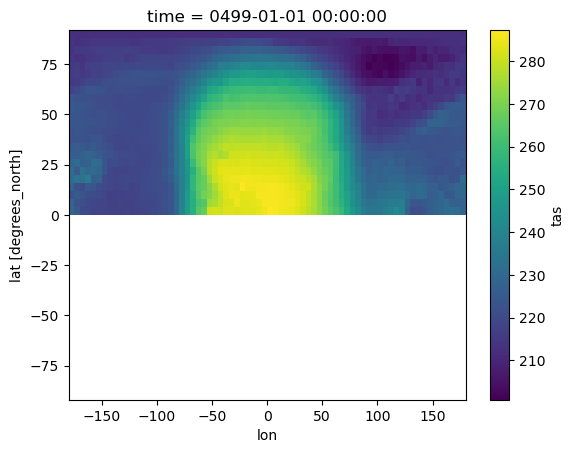

In [14]:
# It is also possible to 'mask' or 'filter' the data.
# Taking final time step of surface air temperature for examples
gcm_slice_tas = gcm_data\
    .isel(time=-1)\
    ['tas']

# Mask data to northern hemisphere and plot
gcm_slice_tas\
    .where(gcm_slice_tas.lat > 0)\
    .plot(x='lon', y='lat')

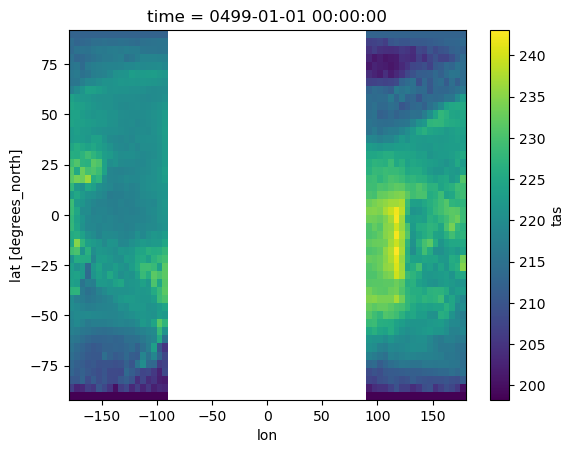

In [15]:
# If using multiple conditions, note the use of brackets.
# | means "or"
# & means "and"
# Mask data to night-side of tidally-locked planet and plot
gcm_slice_tas\
    .where(
        (gcm_slice_tas.lon < -90) | (gcm_slice_tas.lon > 90)
    )\
    .plot(x='lon', y='lat')

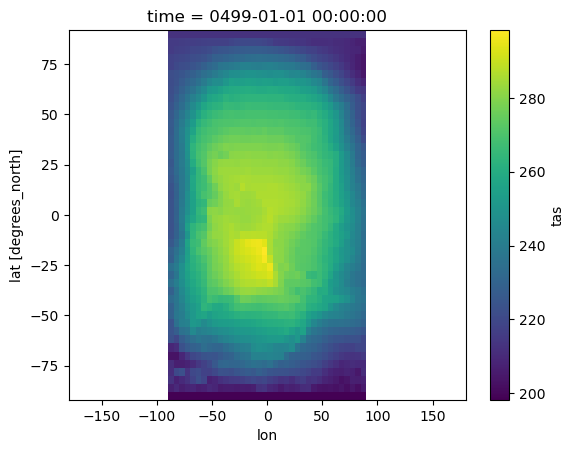

In [16]:
# Mask data to day-side of tidally-locked planet and plot
gcm_slice_tas\
    .where(
        (gcm_slice_tas.lon < 90) & (gcm_slice_tas.lon > -90)
    )\
    .plot(x='lon', y='lat')